(100,)


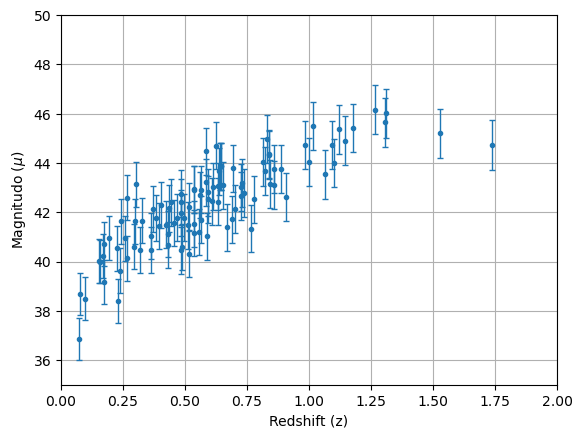

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

print(np.shape(z_sample))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.', lw=1, capsize = 2, label='data' )
plt.xlabel("Redshift (z)")
plt.ylabel(rf"Magnitudo $(\mu)$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.grid()

Text(0.5, 0.94, 'Polynomial fits of different degrees')

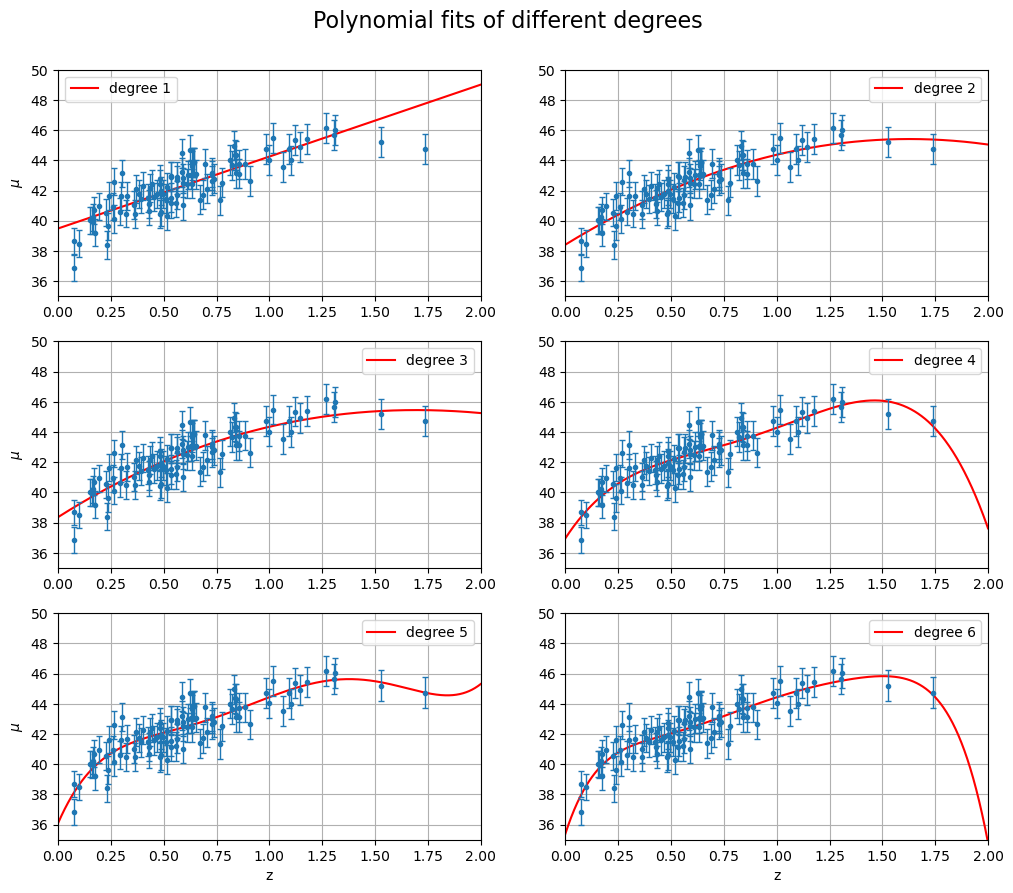

In [118]:
#Trying different degrees for polynomial fitting
fig1, ax1 = plt.subplots(3,2, figsize=(12,10))

for i, d in zip(range(6), np.arange(1, 7)):
    p = np.polyfit(z_sample, mu_sample, d, w= 1/dmu)
    z_fit = np.linspace(0,2, 1000)
    mu_fit = np.polyval(p, z_fit)
    ax1[i//2, i%2].plot(z_fit, mu_fit, color = 'red', label=f"degree {d}")
    ax1[i//2, i%2].errorbar(z_sample, mu_sample, dmu, fmt='.', lw=1, capsize = 2)
    ax1[i//2, i%2].set_xlim(0, 2)
    ax1[i//2, i%2].set_ylim(35, 50)
    ax1[i//2, i%2].grid()
    ax1[i//2, i%2].legend()

ax1[0, 0].set_ylabel(rf"$\mu$")
ax1[1, 0].set_ylabel(rf"$\mu$")
ax1[2, 0].set_ylabel(rf"$\mu$")
ax1[2, 0].set_xlabel("z")
ax1[2, 1].set_xlabel("z")
fig1.suptitle("Polynomial fits of different degrees", fontsize=16,y=0.94)


Train errors: [0.98514386 0.89598932 0.89633552 0.81233459 0.79334993 0.79289951]
Validation errors: [1.00288028 0.92926196 0.9351416  1.04259846 1.06355365 1.06878312]
prova:  [0.48779261 1.01633991 0.5359888  0.09800896 0.55672118 0.44245798
 0.32043128 0.38195931 0.5639978  0.64057897]


(1.0, 6.0)

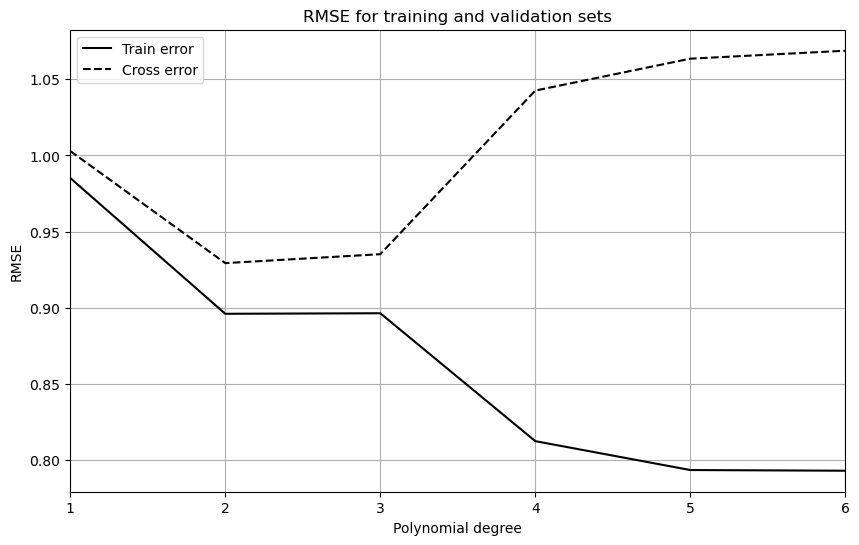

In [119]:
#Searching best degree through BIC using 60% for training, 20% for validation and 20% for testing
from sklearn.model_selection import train_test_split
train_ratio = 0.7
z_train, z_val, mu_train, mu_val, dmu_train, dmu_val = train_test_split(z_sample, mu_sample, dmu, train_size=train_ratio)
#z_val, z_test, mu_val, mu_test, dmu_val, dmu_test = train_test_split(z_temp, mu_temp, dmu_temp, test_size=val_ratio/(val_ratio + test_ratio))
degrees = np.arange(1, 7)  # Polynomial degrees from 1 to 6
train_error = np.zeros(len(degrees))
cross_error = np.zeros(len(degrees))
#AIC_train_score = np.zeros(10)
#AIC_val_score = np.zeros(10)


# Fitting polynomials of degree 1 to 6 calculating rmse for training and validation sets 
# Note: AIC is calculated as 2d - 2 * log-likelihood,
# where log-likelihood is approximated by the mean squared error divided by the variance.
# The lower the AIC, the better the model

for d in degrees:
    p = np.polyfit(z_train, mu_train, d, w= 1/dmu_train)
    train_error[d-1] = np.sqrt(np.sum((np.polyval(p, z_train) - mu_train)**2)/len(z_train))
    cross_error[d-1] = np.sqrt(np.sum((np.polyval(p, z_val) - mu_val)**2)/len(z_val))
    '''AIC_train_score[d-1] = 2*d +2*((np.polyval(p, z_train)-mu_train)**2/dmu_train**2)/len(z_train)
    AIC_val_score[d-1] = 2*d +2*np.sum((np.polyval(p, z_val)-mu_val)**2/dmu_val**2)/len(z_val)'''

print("Train errors:", train_error)
print("Validation errors:", cross_error)   

'''print("AIC train scores:", AIC_train_score)
print("AIC validation scores:", AIC_val_score)
fig2, ax2  = plt.subplots(figsize= (10, 6))
ax2.plot(np.arange(1,9), AIC_train_score[:8], '-', label = 'AIC train')
ax2.plot(np.arange(1,9), AIC_val_score[:8], '--', label = 'AIC val')'''

print("prova: ", z_train[0:10])

fig3, ax3  = plt.subplots(figsize= (10, 6))
ax3.plot(degrees, train_error, '-k', label = 'Train error')
ax3.plot(degrees, cross_error, '--k', label = 'Cross error')
ax3.legend()
ax3.set_xlabel("Polynomial degree")
ax3.set_ylabel("RMSE")
ax3.set_title("RMSE for training and validation sets")
ax3.grid()
ax3.set_xlim(1, 6)

(100,)


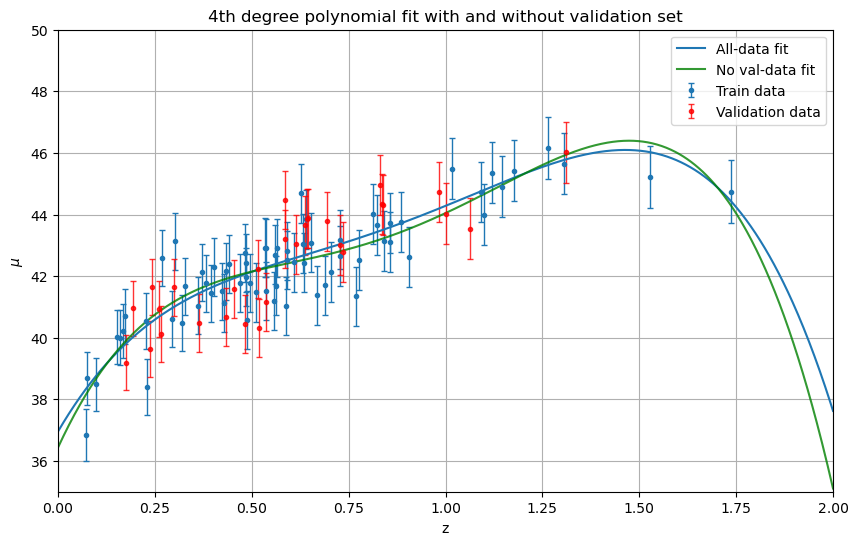

In [120]:
#Plotting 4th degree polynomial with or without validation set
p_all = np.polyfit(z_sample, mu_sample, 4, w= 1/dmu)
p_wout_val = np.polyfit(z_train, mu_train, 4, w= 1/dmu_train)

fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.errorbar(z_train, mu_train, dmu_train, fmt='.', lw=1, capsize = 2, label='Train data')
ax4.errorbar(z_val, mu_val, dmu_val, fmt='.', lw=1, capsize = 2, label='Validation data', color = 'red', alpha=0.8)
ax4.plot(z_fit, np.polyval(p_all, z_fit), label='All-data fit', color ='tab:blue')
ax4.plot(z_fit, np.polyval(p_wout_val, z_fit), label='No val-data fit', color='green', alpha=0.8)
ax4.legend()
ax4.set_xlabel("z")
ax4.set_ylabel(rf"$\mu$")
ax4.set_xlim(0, 2)
ax4.set_ylim(35, 50)
ax4.grid()
ax4.set_title("4th degree polynomial fit with and without validation set")
print(z_sample.shape)

Train errors (cross-validation): [0.99299039 0.9102988  0.91269112 0.85760479 0.86664011 0.85941524]
Validation errors (cross-validation): [1.00461493 0.9416588  0.93823546 0.97914676 0.91327084 1.22381147]


(1.0, 6.0)

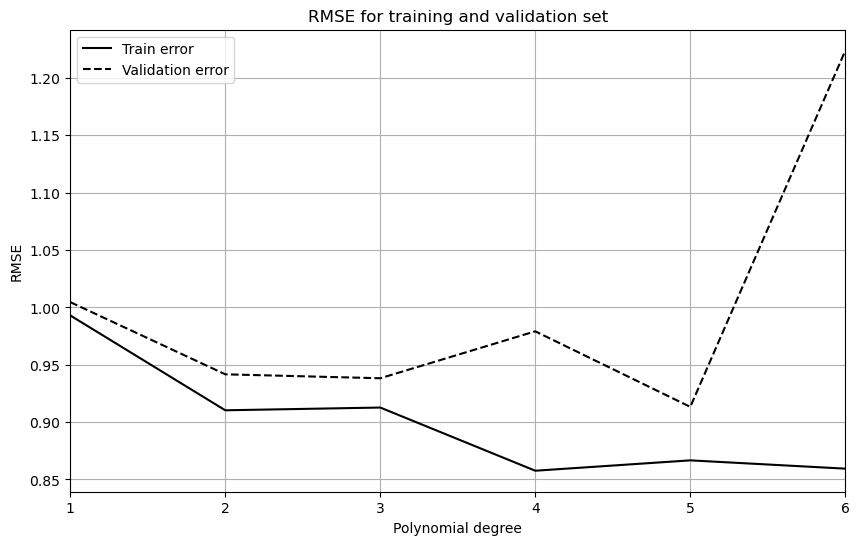

In [121]:
#TRYING CROSS-VALIDATION BY HAND
#def count_elements(vec1, vec2):
    #return np.isin(vec1, vec2).sum()        #Counts how many elements of vec1 are present in vec2. 


train_error = np.zeros(len(degrees))
val_error = np.zeros(len(degrees))

K = 20  # Number of folds
fold_hist = np.arange(0,100) # To keep track of folds already used
for d in degrees:
    for k in range(K):
        fold = np.random.choice(fold_hist, size=int(100*(1-train_ratio)))
        fold_hist = np.delete(fold_hist, np.where(np.random.choice(fold, size = 2)))
        z_val = z_sample[fold]
        mu_val = mu_sample[fold]
        dmu_val = dmu[fold]
        z_train = np.delete(z_sample, fold)
        mu_train = np.delete(mu_sample, fold)
        dmu_train = np.delete(dmu, fold)
        p = np.polyfit(z_train, mu_train, d, w= 1/dmu_train)
        train_error[d-1] += np.sqrt(np.sum((np.polyval(p, z_train) - mu_train)**2)/len(z_train))
        val_error[d-1] += np.sqrt(np.sum((np.polyval(p, z_val) - mu_val)**2)/len(z_val))
        fold_hist = np.append(fold_hist, fold)
    train_error[d-1] /= K
    val_error[d-1] /= K
print("Train errors (cross-validation):", train_error)
print("Validation errors (cross-validation):", val_error)

fig5, ax5 = plt.subplots(figsize= (10, 6))
ax5.plot(degrees, train_error, '-k', label = 'Train error')
ax5.plot(degrees, val_error, '--k', label = 'Validation error')
ax5.legend()
ax5.set_xlabel("Polynomial degree")
ax5.set_ylabel("RMSE")
ax5.set_title("RMSE for training and validation set")
ax5.grid()
ax5.set_xlim(1, 6)


Train errors (cross-validation): [0.98568671 0.90310217 0.90292172 0.87003344 0.86373533 0.86057733]
Validation errors (cross-validation): [0.94856017 0.88875791 0.91984324 0.91075932 0.86975046 1.23761675]


(1.0, 6.0)

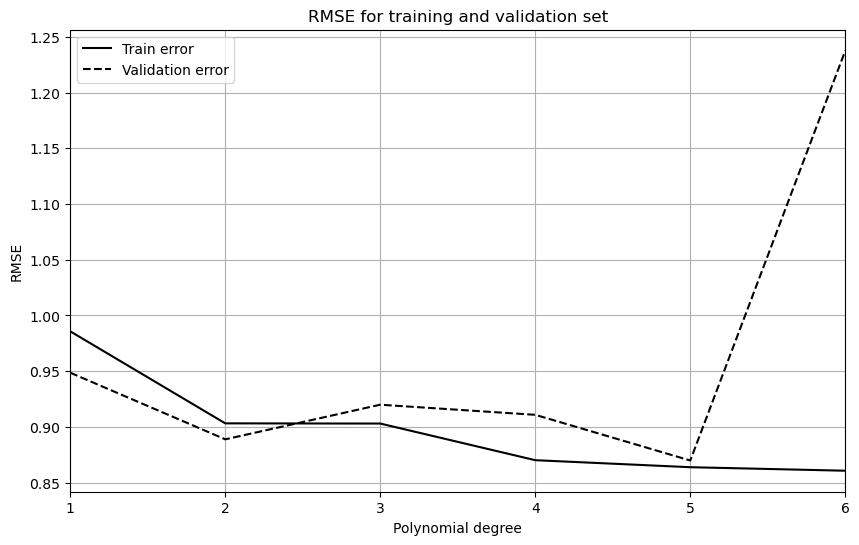

In [122]:
#CROSS VALIDATION BY HAND 2
#Reorder casually indices from 0 to 99
new_order = np.arange(100)
np.random.shuffle(new_order)
# Reorder z_sample, mu_sample and dmu according to the new indices
z_sample_reord = np.array(z_sample[new_order])
mu_sample_reord = np.array(mu_sample[new_order])
dmu_reord = np.array(dmu[new_order])

#Separate the data into k folds
K = 20  # Number of folds
z_folds = np.array_split(z_sample_reord, K)
mu_folds = np.array_split(mu_sample_reord, K)
dmu_folds = np.array_split(dmu_reord, K)
train_error = np.zeros(len(degrees))
val_error = np.zeros(len(degrees))

for d in degrees:
    for k in range(K):
        z_val = z_folds[k]
        mu_val = mu_folds[k]
        dmu_val = dmu_folds[k]
        z_train = np.concatenate([z_folds[i] for i in range(K) if i != k])
        mu_train = np.concatenate([mu_folds[i] for i in range(K) if i != k])
        dmu_train = np.concatenate([dmu_folds[i] for i in range(K) if i != k])
        p = np.polyfit(z_train, mu_train, d, w= 1/dmu_train)
        train_error[d-1] += np.sqrt(np.sum((np.polyval(p, z_train) - mu_train)**2)/len(z_train))
        val_error[d-1] += np.sqrt(np.sum((np.polyval(p, z_val) - mu_val)**2)/len(z_val))
    train_error[d-1] /= K
    val_error[d-1] /= K

print("Train errors (cross-validation):", train_error)
print("Validation errors (cross-validation):", val_error)

fig5, ax5 = plt.subplots(figsize= (10, 6))
ax5.plot(degrees, train_error, '-k', label = 'Train error')
ax5.plot(degrees, val_error, '--k', label = 'Validation error')
ax5.legend()
ax5.set_xlabel("Polynomial degree")
ax5.set_ylabel("RMSE")
ax5.set_title("RMSE for training and validation set")
ax5.grid()
ax5.set_xlim(1, 6)

Cross-validation scores: [ 0.19598159  0.26252986  0.21087921  0.23240799  0.3679873  -2.91789351]
Best degree according to cross-validation: 5


(1.0, 6.0)

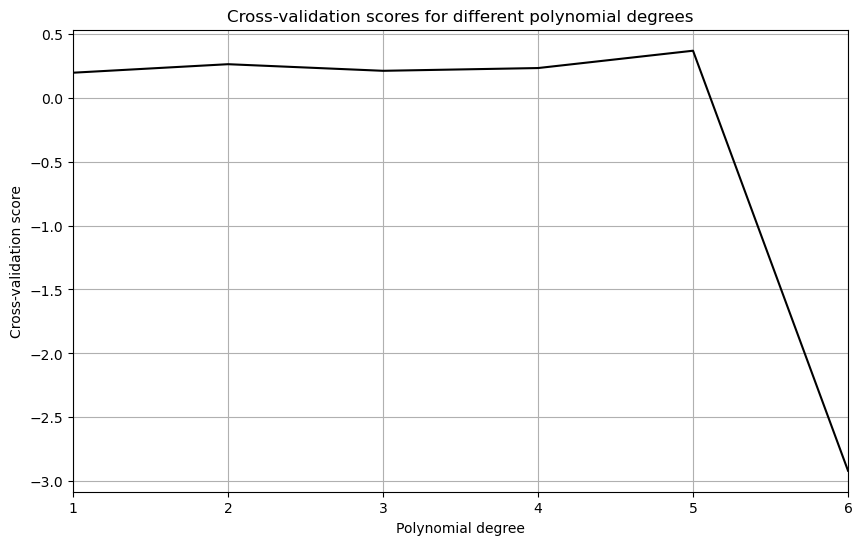

In [123]:
#TRYING CROSS-VALIDATION WITH SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures
scores = np.zeros(len(degrees))
for d in degrees:
    polyfeat = PolynomialFeatures(degree=d)
    z_poly = polyfeat.fit_transform(z_sample.reshape(-1, 1))  # Reshape for sklearn
    scores[d-1] = np.mean(cross_val_score(LinearRegression().fit(z_poly, mu_sample, dmu), z_poly, mu_sample,  cv=K))
print("Cross-validation scores:", scores)
fig6, ax6 = plt.subplots(figsize=(10, 6))
ax6.plot(degrees, scores, '-k')
print("Best degree according to cross-validation:", degrees[np.argmax(scores)])
ax6.set_xlabel("Polynomial degree")
ax6.set_ylabel("Cross-validation score")
ax6.set_title("Cross-validation scores for different polynomial degrees")
ax6.grid()
ax6.set_xlim(1, 6)


(1.0, 6.0)

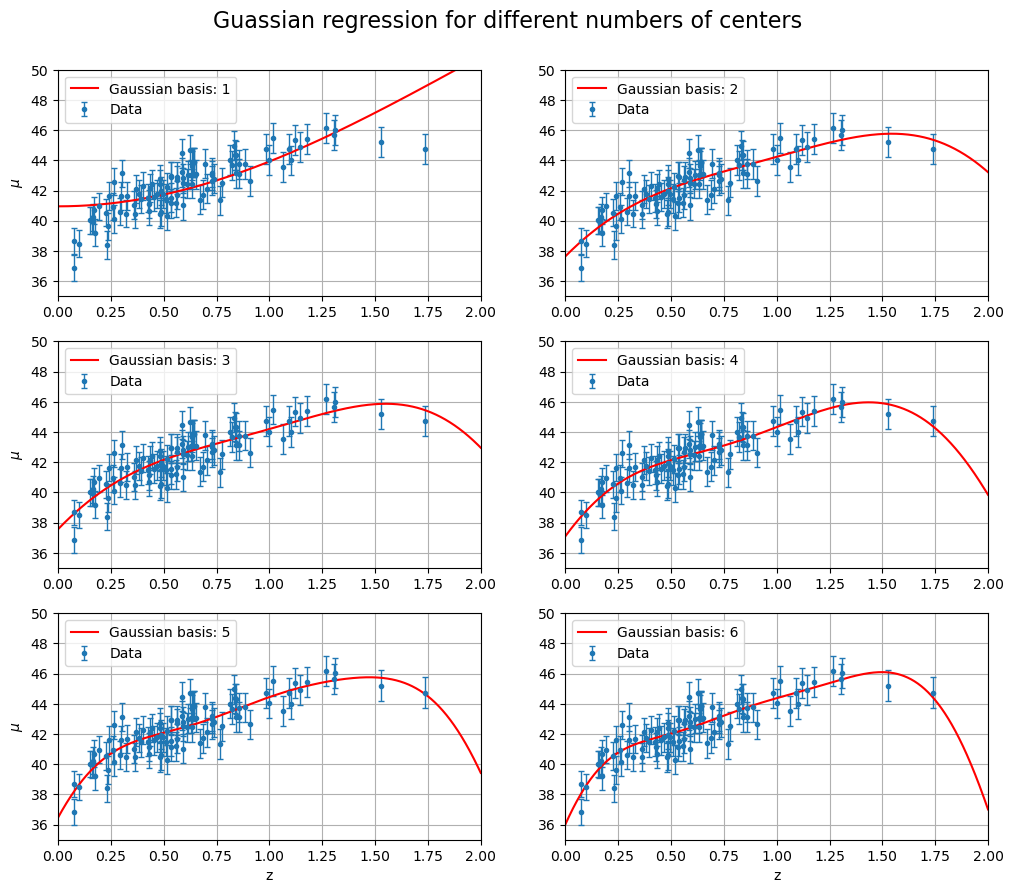

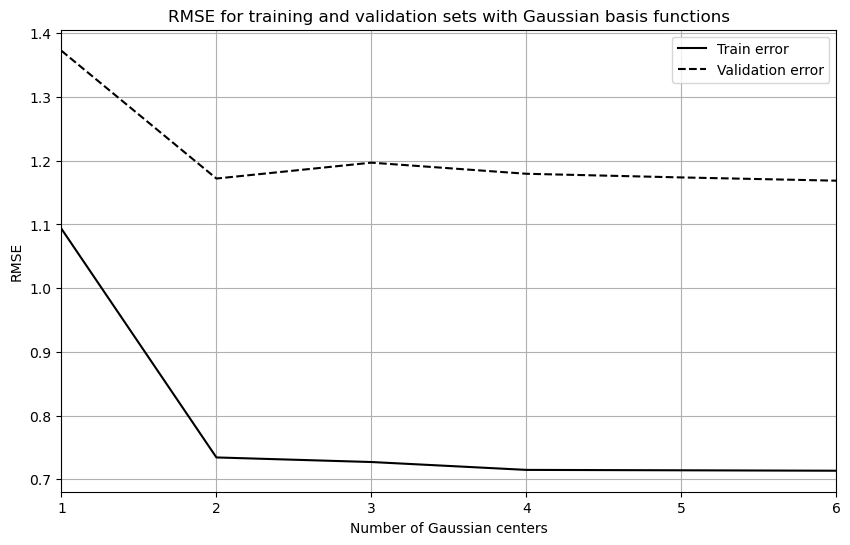

In [124]:
#BASIS FUNCTION REGRESSION
from astroML.linear_model import BasisFunctionRegression

nrange = np.arange(1,7)  # Number of basis functions from 1 to 6
fig6, ax6 = plt.subplots(3,2, figsize=(12, 10))
# Reshape for BasisFunctionRegression
# Fit Gaussian basis functions
for n in nrange:
    z_gridtest = np.linspace(0,2,n)[:, None] # Positions of the gaussians' centers
    sigma_test = 2/n   # widths of these Gaussians
    model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=sigma_test)
    model.fit(z_sample.reshape(-1,1), mu_sample, dmu)
    mu_pred = model.predict(z_fit[:, None])  # Predict on the grid
    ax6[(n-1)//2, (n-1)%2].errorbar(z_sample, mu_sample, dmu, fmt='.', lw=1, capsize=2, label='Data')
    ax6[(n-1)//2, (n-1)%2].plot(z_fit, mu_pred, label=f'Gaussian basis: {n}', color='red')
    ax6[(n-1)//2, (n-1)%2].legend()
    ax6[(n-1)//2, (n-1)%2].set_xlim(0, 2)
    ax6[(n-1)//2, (n-1)%2].set_ylim(35, 50)
    ax6[(n-1)//2, (n-1)%2].grid()

ax6[0, 0].set_ylabel(rf"$\mu$")
ax6[1, 0].set_ylabel(rf"$\mu$")
ax6[2, 0].set_ylabel(rf"$\mu$")
ax6[2, 0].set_xlabel("z")
ax6[2, 1].set_xlabel("z")
fig6.suptitle("Guassian regression for different numbers of centers", fontsize=16,y=0.94)


#CROSS VALIDATION ON NUMBER OF GAUSSIANS CENTERS

z_train, z_val, mu_train, mu_val, dmu_train, dmu_val = train_test_split(z_sample, mu_sample, dmu, train_size=train_ratio)
bf_train_error = np.zeros(len(nrange))
bf_val_error = np.zeros(len(nrange))
for n in nrange:
    z_gridtrain = np.linspace(0,2,n)[:,None]
    sigma_train = 2/n
    Gaussmodel = BasisFunctionRegression('gaussian', mu=z_gridtrain, sigma=sigma_train)
    Gaussfit = Gaussmodel.fit(z_train.reshape(-1,1), mu_train, dmu_train)
    Gausspredict_train = Gaussfit.predict(z_train[:, None])
    Gausspredict_val = Gaussfit.predict(z_val[:, None])
    bf_train_error[n-1] = np.sqrt(np.sum((Gausspredict_train - mu_train)**2) / len(z_train))
    bf_val_error[n-1] = np.sqrt(np.sum((Gausspredict_val - mu_val)**2) / len(z_val))

fig7, ax7 = plt.subplots(figsize=(10, 6))
ax7.plot(nrange, bf_train_error, '-k', label='Train error')
ax7.plot(nrange, bf_val_error, '--k', label='Validation error')
ax7.legend()
ax7.set_xlabel("Number of Gaussian centers")
ax7.set_ylabel("RMSE")
ax7.set_title("RMSE for training and validation sets with Gaussian basis functions")
ax7.grid()
ax7.set_xlim(1, 6)



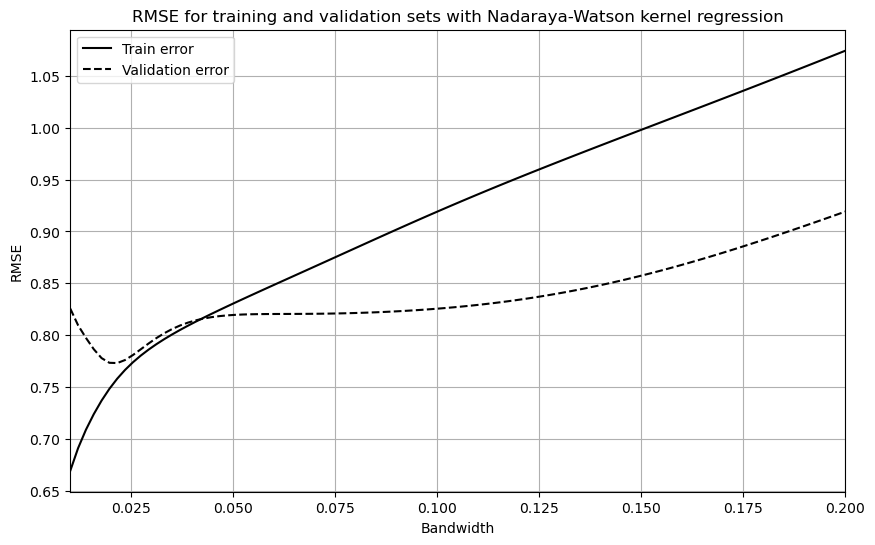

In [125]:
from astroML.linear_model import NadarayaWatson


# Ensure your input data is properly formatted
z_sample = z_sample.reshape(-1, 1)  # Make sure it's 2D
mu_sample = mu_sample.ravel()        # Make sure it's 1D
dmu = dmu.ravel()                   # Make sure it's 1D

z_train, z_val, mu_train, mu_val, dmu_train, dmu_val = train_test_split(z_sample, mu_sample, dmu,train_size=train_ratio)

bwrange = np.linspace(0.01, 0.2, 100)
kr_train_error = np.zeros(len(bwrange))
kr_val_error = np.zeros(len(bwrange))

for i, bw in enumerate(bwrange):
   
    kernel_model = NadarayaWatson(kernel='gaussian')
    kernel_model.h = bw  # Set bandwidth directly
    
    kernel_model.fit(z_train, mu_train)
    
    kernel_train = kernel_model.predict(z_train)
    kernel_val = kernel_model.predict(z_val)
    
    kr_train_error[i] = np.sqrt(np.mean((kernel_train - mu_train)**2))
    kr_val_error[i] = np.sqrt(np.mean((kernel_val - mu_val)**2))

fig8, ax8 = plt.subplots(figsize=(10, 6))
ax8.plot(bwrange, kr_train_error, '-k', label='Train error')
ax8.plot(bwrange, kr_val_error, '--k', label='Validation error')
ax8.set_xlabel("Bandwidth")
ax8.set_ylabel("RMSE")
ax8.set_title("RMSE for training and validation sets with Nadaraya-Watson kernel regression")
ax8.grid()
ax8.set_xlim(0.01, 0.2)
ax8.legend()

